# Thin beam longitudinal offset

Paper: [_Optimal laser focusing for positron production in laser-electron scattering_, Óscar Amaro and Marija Vranic 2021 New J. Phys. __23__ 115001](https://iopscience.iop.org/article/10.1088/1367-2630/ac2e83)

Preprint: https://arxiv.org/abs/2106.01877

In this notebook we show the consistency between the analytical expression for the a0eff distribution and particle sampling in a thin beam geometry with longitudinal offset.

In [1]:
import os
import sys
sys.path.append('../QScatter')
import QScatter
from QScatter import *

In [2]:
## parameters
# laser
lbd = 0.8; #[\mu m]
a0 = 1; #[]
W0 = 3; #[\mu m]
zR = pi*W0**2/lbd; #[\mu m]
# beam
L = 200.0; #[\mu m]
R = 0.5; #[\mu m]
sigmaR = R/sqrt(2); #[\mu m]
# limit
az = a0/sqrt(1+(L/4/zR)**2)
Nb = 1; #[]

In [3]:
# simulation parameters
Nsmpl = int(1e6);

# distribution
DeltaL = L/10; #[\mu m]
zdist = L/2*rng.random(Nsmpl)-L/4 + DeltaL; #[\mu m]

# calculate a
adim = 60; #[]
nbins = 30;
alst = np.linspace(0.001*a0,0.999*a0,adim); #[]
abins = np.linspace(0.001*a0,0.999*a0,nbins); #[]
da = abins[1]-abins[0]; #[]
adist = gauss3D(zdist,0,0,a0,W0,lbd); #[]
# histogram
adist_y,adist_x = np.histogram(adist,abins) #[]
# normalize to Nb
adist_y, adist_x = adist_y*Nb/Nsmpl, arraycenter(adist_x)
# analytical distribution
ath_y,ath_x = Nb * dNda_Thin_3D(alst,a0,L,W0,lbd,DeltaL), alst

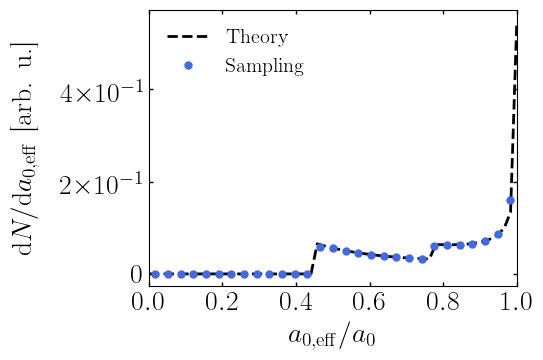

In [5]:
plt.style.use("../QScatter/style.txt")
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,4))

plt.plot(ath_x/a0, ath_y*da/2,'k--',label=r'Theory')
plt.plot(adist_x/a0, adist_y,'.',color='royalblue',label=r'Sampling')
plt.xlabel(r'$a_{0,\mathrm{eff}}/a_0$')
plt.ylabel(r'$\mathrm{d}N/\mathrm{d}a_{0,\mathrm{eff}}$ [arb. u.]',labelpad=15)
plt.legend(frameon=False,loc='upper left')
plt.tick_params(which='both',axis="y",direction="in", labelleft=True, labelright=False, left=True, right=True)
plt.tick_params(which='both',axis="x",direction="in", labeltop=False, labelbottom=True, top=True, bottom=True)
#plt.xlim([0.9*az,a0])
#plt.ylim([0,6e5])
plt.xticks([0,0.2,0.4,0.6,0.8,1])
#plt.yticks([0,2e5,4e5,6e5])
plt.gca().yaxis.set_major_formatter(MathTextSciFormatter("%1.0e"))
# aspect
axes.set_box_aspect(aspect=3/4)
# final
plt.tight_layout()
#plt.savefig('Thin_3D_DeltaL.pdf')
plt.show()